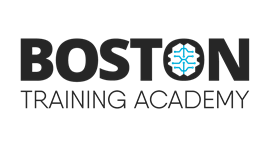

<h1><center>BTA - The Education Initiative of Boston Limited</center></h1>

# Introduction to Pandas

## Library Highlights
- A fast and efficient DataFrame object for data manipulation with integrated indexing;

- Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;

- Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;

- Flexible reshaping and pivoting of data sets;

- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;

- Columns can be inserted and deleted from data structures for size mutability;

- Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;

- High performance merging and joining of data sets;

- Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;

- Time series-functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;

- Highly optimized for performance, with critical code paths written in Cython or C.

- Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

##### Let Begine our Data Science Journey with Pandas
**Note Cheatsheet for Pandas** 
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

#### Importing Pandas package from python site packages

In [ ]:
import pandas as pd

## Step 1: Data Collection from flat file using Pandas read_csv command

In [ ]:
mydata=pd.read_csv(r'train.csv')

mydata is now a **DataFrame: Two-dimensional, size-mutable, potentially heterogeneous tabular data.**

Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

You can also read excel file, json, text file & many more format in pandas just check out the documentation 
**Explore the data with head command, head give your 5 rows of the dataset**

In [ ]:
mydata.head()

**info()** function Print a concise summary of a DataFrame.

This method/function prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

## Step 2: Data Transformation

if you look at your **Date.of.Birth** its a string, lets change it datetime format
mydata['Date.of.Birth'] 

**type()** function in python lets you know the metadata or attribute information of the variable

In [ ]:
type(mydata['Date.of.Birth'][0])

**pd.to_datetime()** help you in assembling a datetime from multiple columns of a DataFrame. The keys can be common abbreviations like [‘year’, ‘month’, ‘day’, ‘minute’, ‘second’, ‘ms’, ‘us’, ‘ns’]) or plurals of the same

In [ ]:
mydata['Date.of.Birth']=pd.to_datetime(mydata['Date.of.Birth'])

In [ ]:
type(mydata['Date.of.Birth'][0])

you can extract the **day**, **month**, **year** by passing the key words in the  mydata['Date.of.Birth'].dt. function

In [ ]:
mydata['Date.of.Birth'].dt.month

In [ ]:
mydata['DisbursalDate']=pd.to_datetime(mydata['DisbursalDate'])

The feature **CREDIT.HISTORY.LENGTH** columns has numerical and string values attached together computer cannot understand this data lets convert it reable format

In [ ]:
mydata['CREDIT.HISTORY.LENGTH'].head()

Lets build an userdefined function to extract values of years & Months and convert into uniform measurement(Months)
Ex: "1yrs 11mon" has to transformed 12+11=33 months 

In [ ]:
def String_to_months(date):
    list_yrs_mon=date.split()
    year,month=list_yrs_mon[0][:-3],list_yrs_mon[1][:-3]
    c_months=int(year)*12+int(month)
    return c_months

How this function works??? see this 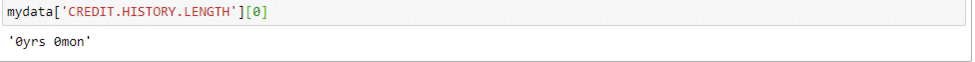

In [ ]:
mydata['CREDIT.HISTORY.LENGTH.MONTHS']=mydata['CREDIT.HISTORY.LENGTH'].apply(String_to_months)

## Assignment 
Transform the column "AVERAGE.ACCT.AGE" simialr to CREDIT.HISTORY.LENGTH.MONTHS

[Hint_AVERAGE.ACCT.AGE](#Hint_AVERAGE.ACCT.AGE)

## Step:3 Check for Missing Values & Subsetting the Data

#### As you can see their is a lot of columns & rows in the dataset, let's start by subsetting the dataset 
##### Subset Variables (Columns)
define a list of columns of which are interest for our Customer analysis task 

*Note: your free to add more columns*

In [ ]:
list_columns=['disbursed_amount','asset_cost','Date.of.Birth','Employment.Type','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'loan_default']

now let's subset operation

In [ ]:
customer_info=mydata[list_columns]

### check for missing value
**isnull** or **isna** are functions available. 
read more on documentation to know the difference 

In [ ]:
customer_info.isnull()

the isnull or isna returns boolen result to count we will pass sum method 

In [ ]:
customer_info.isnull().sum()

you can see the function **isnull().sum()** is shows a result of columns & count of missing values.

**Employment.Type has 7661 missing values** lets now fill them with **fillna** method in python


## strategy for missing values
- Imputation Method 1:Replace NA with a scalar value
- Imputation Method 2:Mean
- Imputation Method 3:Median
- Imputation Method 4:Mode

**Imputation Method 1:** we will impute with a value: of ***Salaried***

In [ ]:
customer_info['Employment.Type']=customer_info['Employment.Type'].fillna('Salaried')

In [ ]:
customer_info.isnull().sum()

### Assignment Imputation

The code below will rest the data

In [ ]:
customer_info=mydata[list_columns]

Imputation Method 4 Impute with modal value of the categorical values in the place of ##Fix ME##

In [ ]:
customer_info['Employment.Type'].fillna(##Fix ME##)

[Hint_Missing_Values](#Hint_Missing_Values)

## Subsetting the Data with condition 

we can subset the data with a condition, now lets see how many customer are having a loan amount disbursed more than 30000

In [ ]:
mydata['disbursed_amount']>30000

The above line returns a boolen result now lets pass this boolen result onto a DataFrame to get our data. 

In [ ]:
mydata[mydata['disbursed_amount']>30000]

we can apply multiple conditions to subset our data, to do this we can use by applying AND, OR conditions an example is show below where we trying to subset the data with respect to the amount disbured & Employment Type

In [ ]:
mydata[mydata['disbursed_amount']>30000]

In [ ]:
mydata[(mydata['disbursed_amount']>30000) & (mydata['Employment.Type']=='Salaried')]

## Subsetting the Data according to Data types
Lets pull categorical features into a separate dataframe

In [ ]:
cat_mydata=mydata.select_dtypes(include='object')
cat_mydata.head()

Lets drop the columns **AVERAGE.ACCT.AGE**	**CREDIT.HISTORY.LENGTH** from the cat_mydata as we have already transformed it in step 2

In [ ]:
cat_mydata=cat_mydata.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'],axis=1)

In [ ]:
cat_mydata.head()

## Step 4: Descriptive statistics
Lets us start a our data analysis journey with finding out **Mean, Median, Mode, Max, Min, Standard Deviation and quartile values**
- The "mean" is the "average" you're used to, where you add up all the numbers and then divide by the number of numbers. 
- The "median" is the "middle" value in the list of numbers. To find the median, your numbers have to be listed in numerical order from smallest to largest, so you may have to rewrite your list before you can find the median. 
- The "mode" is the value that occurs most often. If no number in the list is repeated, then there is no mode for the list.
- Quartiles in statistics are values that divide your data into quarters. However, quartiles aren’t shaped like pizza slices; Instead they divide your data into four segments according to where the numbers fall on the number line. 
    -The four quarters that divide a data set into quartiles are:

    - The lowest 25% of numbers.
    - The next lowest 25% of numbers (up to the median).
    - The second highest 25% of numbers (above the median).
    - The highest 25% of numbers.

In [ ]:
mydata.describe()

Categorical variables are excluded in this data summary so we need use value_counts method

In [ ]:
cat_mydata['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

In [ ]:
cat_mydata['Employment.Type'].value_counts()

#### The dataset has Date.of.Birth column from which Age of the customer can be derived w.r.t the current date.
This is known as Derived columns

In [ ]:
pd.to_datetime('now')

In [ ]:
(pd.to_datetime('now')-mydata['Date.of.Birth']).astype('<m8[Y]')

In [ ]:
mydata['Age']=(pd.to_datetime('now')-mydata['Date.of.Birth']).astype('<m8[Y]')

When we see the summary of the age column we can clear see that thae range of the age columns is from 19 to 70 years

In [ ]:
mydata['Age'].describe()

## Customer Profiling 
### Analysis-I

**Age** is a continuous variable we need convert into categorical so that it will easy for us to build the customer profile

pandas.cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise')
Bin values into discrete intervals.

we use cut when need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.

In [ ]:
pd.cut(mydata['Age'],4).head()

In [ ]:
pd.cut(mydata['Age'],4,labels=['Youth','Youngster','Middleage','oldage'])

In [ ]:
mydata['Age_cat']=pd.cut(mydata['Age'],4,labels=['Youth','Youngster','Middleage','oldage'])

In [ ]:
mydata['Age_cat'].describe()

In [ ]:
mydata['Age_cat'].value_counts(normalize=True)

### Which segment of the age group is having higher loan defaults???

To answer this question lets build a povit table 

mydata.pivot_table(values=None,index=None,columns=None,aggfunc='mean',fill_value=None,margins=False,dropna=True,margins_name='All',observed=False)

Create a spreadsheet-style pivot table as a DataFrame. The levels in
the pivot table will be stored in MultiIndex objects (hierarchical
indexes) on the index and columns of the result DataFrame.

In [ ]:
mydata.pivot_table(values='UniqueID',index='Age_cat',columns='loan_default',aggfunc='count')

lets need find the percentage w.r.t their loan_defaults 

In [ ]:
default_age_cat=mydata.pivot_table(values='UniqueID',columns='Age_cat',index='loan_default',aggfunc='count')
default_age_cat

### pandas.DataFrame.iloc
**property** 
Purely integer-location based indexing for selection by position.

.iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

Allowed inputs are:
- An integer, e.g. 5.
- A list or array of integers, e.g. [4, 3, 0].
- A slice object with ints, e.g. 1:7.
- A boolean array.

A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above). This is useful in method chains, when you don’t have a reference to the calling object, but would like to base your selection on some value.

.iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing (this conforms with python/numpy slice semantics).

In [ ]:
default_age_cat.iloc[0]

In [ ]:
mydata['loan_default'].value_counts()

Now we can divide the default_age_cat with counts of loan default for 0 & 1

In [ ]:
default_age_cat.iloc[0]/mydata['loan_default'].value_counts()[0]

In [ ]:
default_age_cat.iloc[1]/mydata['loan_default'].value_counts()[1]

### Inference 

***The analysis indicates that Youth & Youngster who are having age range from 18 to 45 are the major contributors for loan default*** 

## Customer Profiling 
### Analysis-II

### Which segment of the Employment type is having higher loan defaults???

In [ ]:
Emp_Analysis=mydata.pivot_table(values='UniqueID',index='Employment.Type',columns='loan_default',aggfunc='count')

In [ ]:
Emp_Analysis[1]

In [ ]:
Emp_Analysis[1]/mydata['loan_default'].value_counts()[1]

### Inference 

***The analysis indicates that Self employed are major contributors for loan default with almost 60% out of 50000 defaulters.*** 

### Which segment of the age group & Employment type is having higher loan defaults???

In [ ]:
Emp_age_Analysis=mydata.pivot_table(values='UniqueID',index=['Age_cat','Employment.Type'],columns='loan_default',aggfunc='count')

In [ ]:
Emp_age_Analysis

### Assignment Analysis

Find out the percentage of loan_defaulter in the povit table Emp_age_Analysis table & write your inference. 

### Inference
Write Your Inference??

## Customer Profiling 
### Analysis-III

### Which customer segment has received average amount of disbursed? 

In [ ]:
dist_age_Analysis=mydata.pivot_table(values='disbursed_amount',index='Age_cat',aggfunc="mean")

In [ ]:
dist_age_Analysis

### Inference
Write Your Inference??

## Customer Profiling 
### Analysis-IV
### What is the maximum amount of disbursed based on employment type & Age group? 

In [ ]:
max_dist_emp_Analysis=mydata.pivot_table(values='disbursed_amount',index='Employment.Type',columns='Age_cat',aggfunc="max")

In [ ]:
max_dist_emp_Analysis

### Inference
Write Your Inference??

### Market Analysis
### Analysis-V
When are the busiest business months?? 

In [ ]:
Months_disbursal=mydata['DisbursalDate'].dt.month

In [ ]:
mon_names={1:'January',2:'February', 3:'March', 4:'April', 5:'May',6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [ ]:
Months_disbursal=Months_disbursal.replace(mon_names)
Months_disbursal

In [ ]:
Months_disbursal.value_counts()

### Inference
Write Your Inference??

## Hint_AVERAGE.ACCT.AGE

In [ ]:
mydata['AVERAGE.ACCT.AGE.MONTHS']=mydata['AVERAGE.ACCT.AGE'].apply(String_to_months)

### Hint_Missing_Values

In [ ]:
customer_info['Employment.Type']=customer_info['Employment.Type'].fillna(customer_info['Employment.Type'].mode()[0])

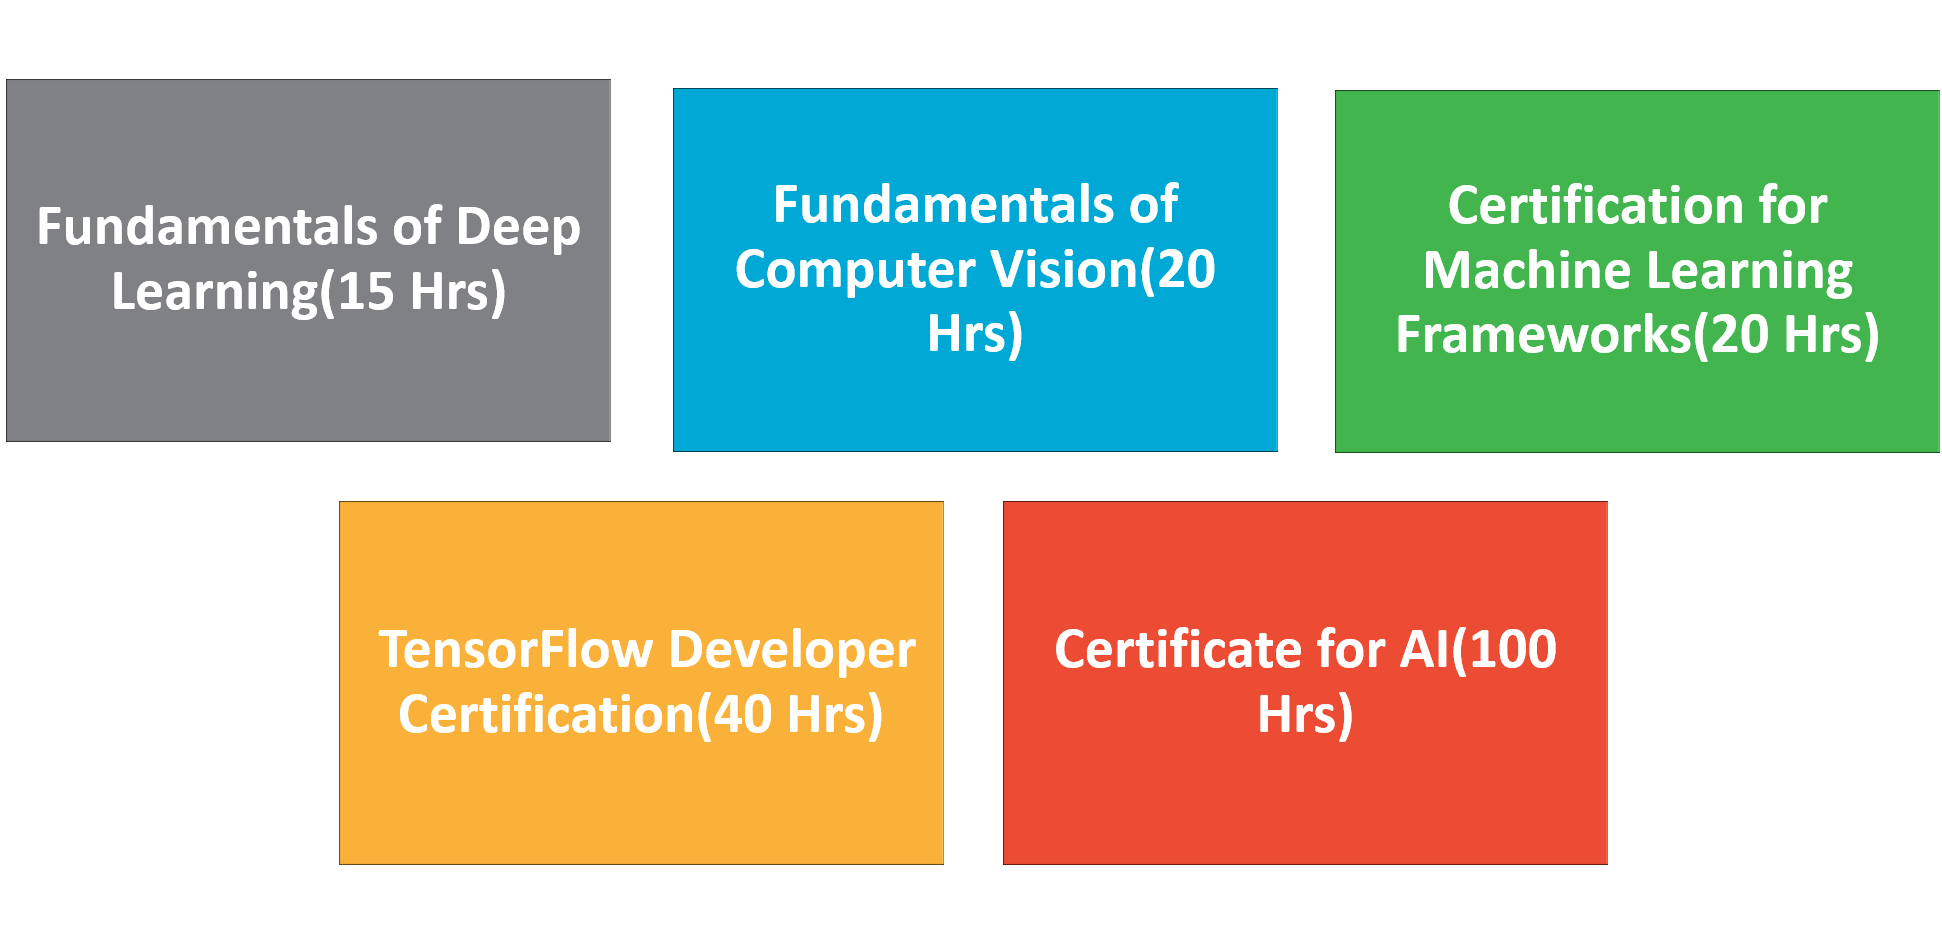